# **Breast Cancer Classification Using Machine Learning**

Link to dataset : https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

1. **Dataset Information** :
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.  They describe characteristics of the cell nuclei present in the image. A few of the images can be found at http://www.cs.wisc.edu/~street/images/

2. **Input Variables** :     
  Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)

	b) texture (standard deviation of gray-scale values)

	c) perimeter

	d) area

	e) smoothness (local variation in radius lengths)

	f) compactness (perimeter^2 / area - 1.0)

	g) concavity (severity of concave portions of the contour)

	h) concave points (number of concave portions of the contour)

	i) symmetry

	j) fractal dimension ("coastline approximation" - 1)



3. **Ouput Variable** :    
Diagnosis (M = malignant, B = benign)

4. **Models Used** :    
    1. Random Forest Classification
    2. Logistic Regression
    3. Xgboost Classification


Github Repo : https://github.com/rajat-kumar-thakur/Breast-Cancer-Classification-Using-Machine-Learning

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from subprocess import check_output
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

## **1. Dataset Collection and Visualization**

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Breast-Cancer-Classification-Using-Machine-Learning/data.csv')

Lets look at all the features of our dataset.

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
col = data.columns
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


We will drop these three columns for the following reason:
1. There is an id that cannot be used for classificaiton.
2. Diagnosis is our class label.
3. Unnamed: 32 feature includes NaN so we do not need it.

In [5]:
y = data.diagnosis
list = ['Unnamed: 32','id','diagnosis']
x = data.drop(list,axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Let us take a look at our output and input variables.

Number of Benign:  357
Number of Malignant :  212


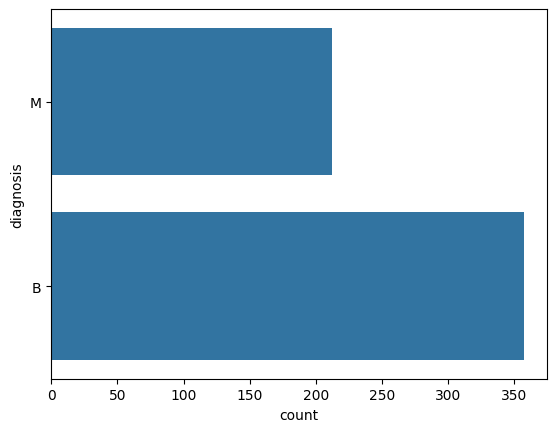

In [6]:
ax = sns.countplot(y,label="Count")
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

In [7]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Visualizations

#### 1. Box Plot

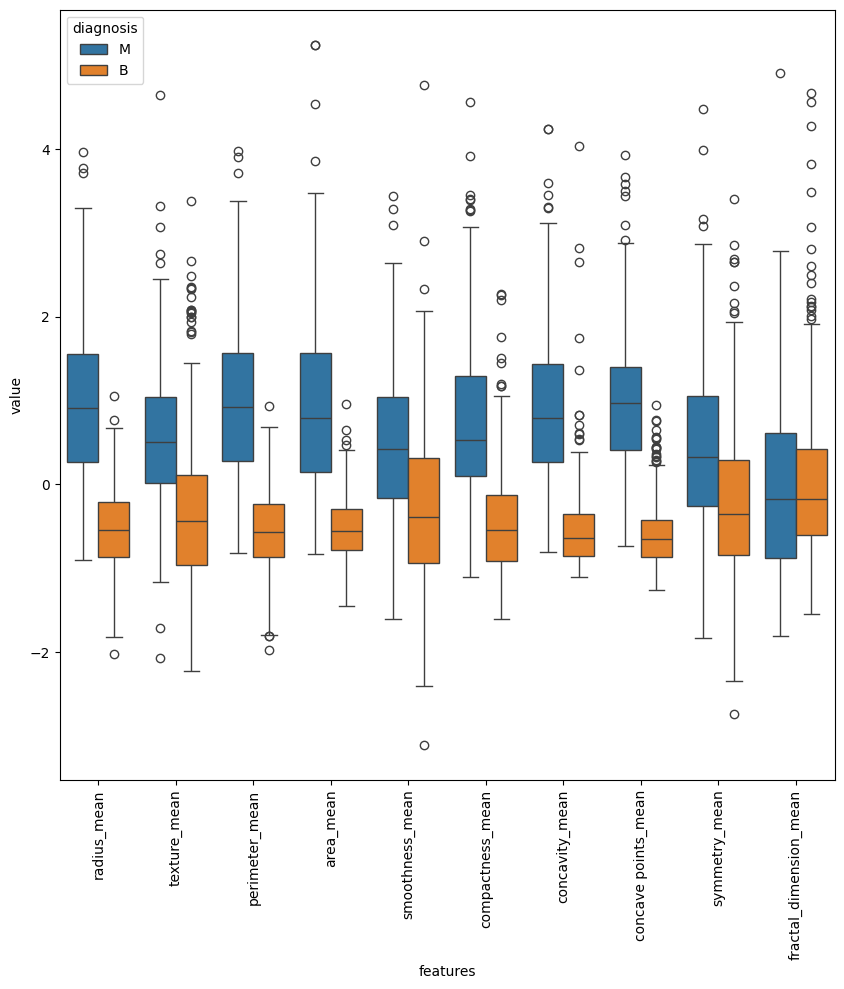

In [8]:
# first ten features
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())
data = pd.concat([y, data_n_2.iloc[:, 0:10]], axis=1)
data = pd.melt(data, id_vars="diagnosis",
               var_name="features",
               value_name='value')

plt.figure(figsize=(10, 10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)
plt.show()

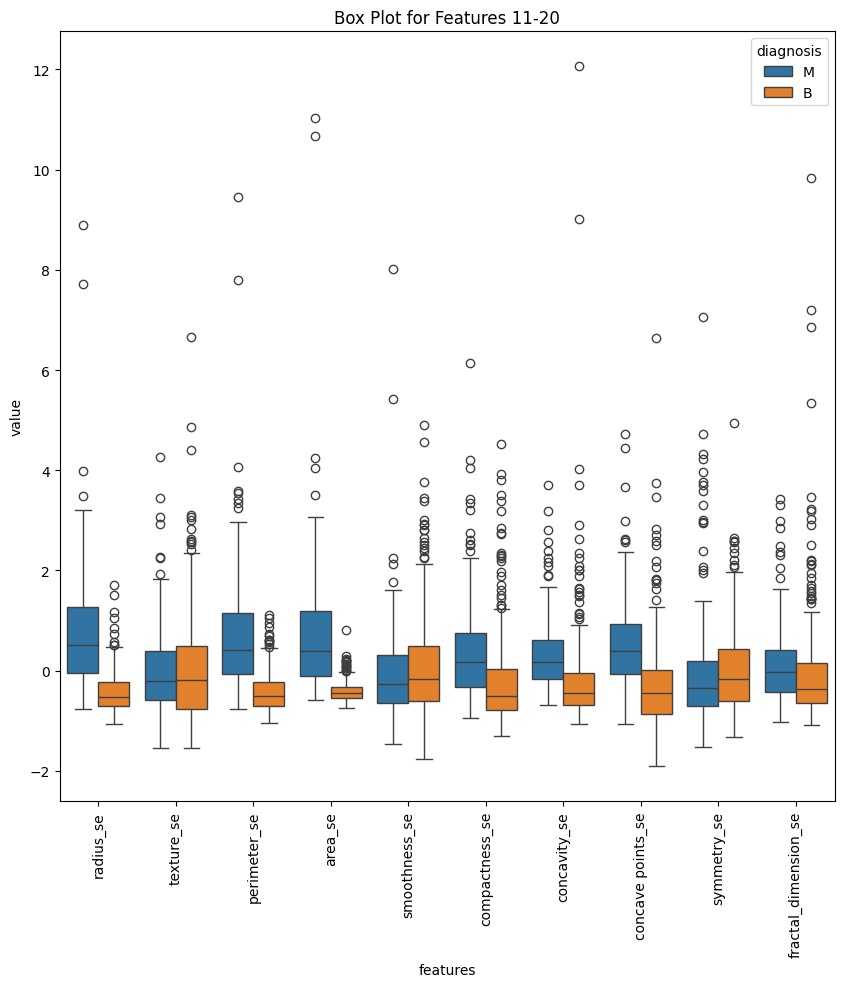

In [9]:
# next ten features (features 11-20)
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())
data = pd.concat([y, data_n_2.iloc[:, 10:20]], axis=1)
data = pd.melt(data, id_vars="diagnosis",
               var_name="features",
               value_name='value')

plt.figure(figsize=(10, 10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)
plt.title("Box Plot for Features 11-20")
plt.show()

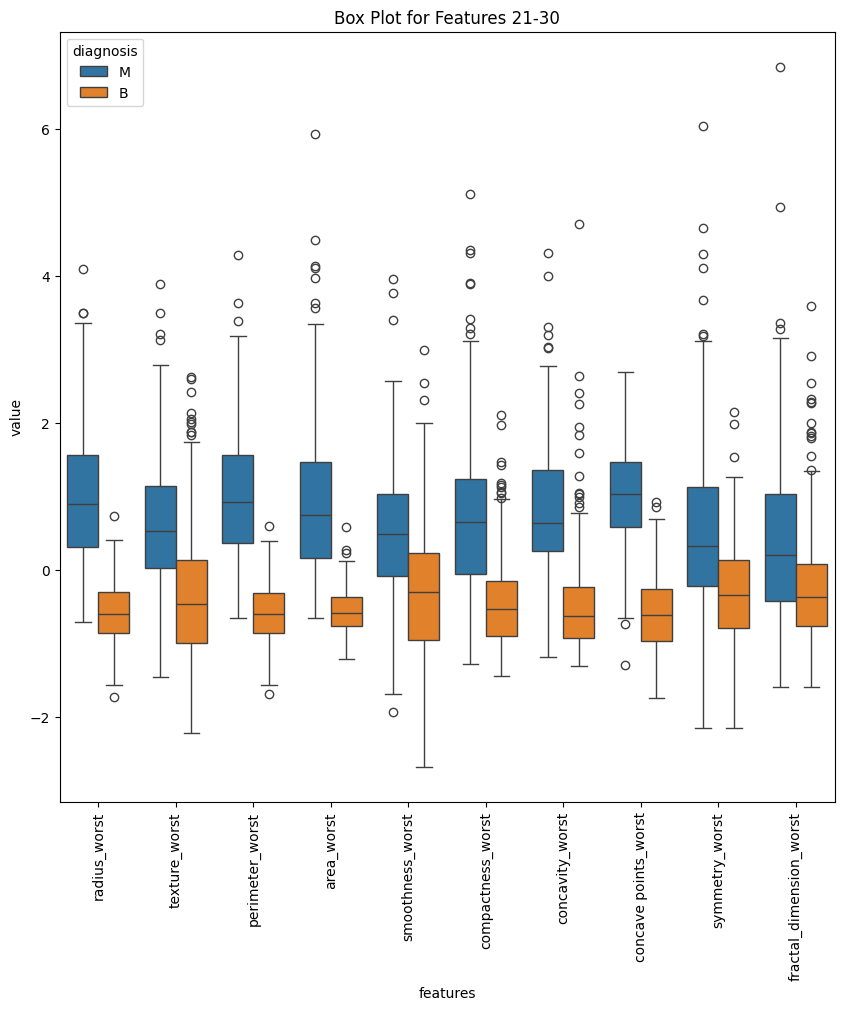

In [10]:
# next ten features (features 21-30)
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())
data = pd.concat([y, data_n_2.iloc[:, 20:30]], axis=1)
data = pd.melt(data, id_vars="diagnosis",
               var_name="features",
               value_name='value')
plt.figure(figsize=(10, 10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)
plt.title("Box Plot for Features 21-30")
plt.show()

In texture_mean feature, median of the Malignant and Benign looks like separated so it can be good for classification. However, in fractal_dimension_mean feature, median of the Malignant and Benign does not looks like separated so it does not gives good information for classification.

#### 2. Joint Plot



In order to compare two features deeper, lets use joint plot. Look at this in joint plot below, it is really correlated. Pearson value is correlation value and 1 is the highest. Therefore, 0.855 is looks enough to say that they are correlated.


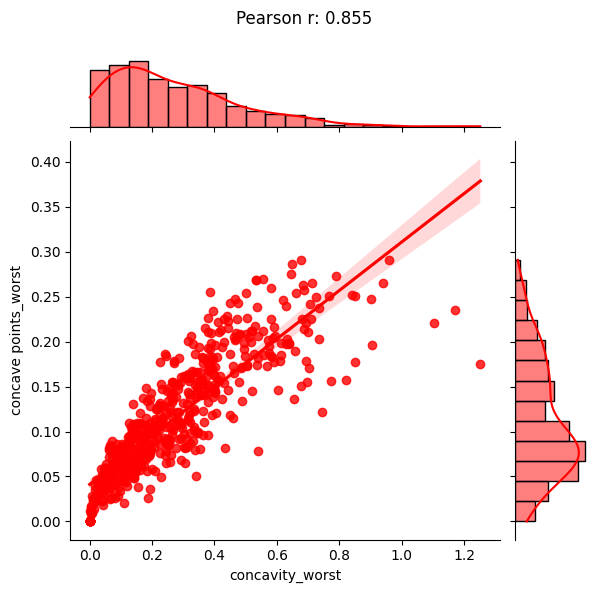

In [11]:
g = sns.jointplot(x='concavity_worst', y='concave points_worst', data=x, kind="reg", color="red")

r = x['concavity_worst'].corr(x['concave points_worst'])
plt.subplots_adjust(top=0.9)
plt.suptitle(f'Pearson r: {r:.3f}', fontsize=12)

plt.show()

#### 3. Violin plots

The violin plot is particularly useful for this dataset because it combines elements of a box plot with a kernel density plot, providing a more comprehensive view of your data's distribution than simpler visualizations.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

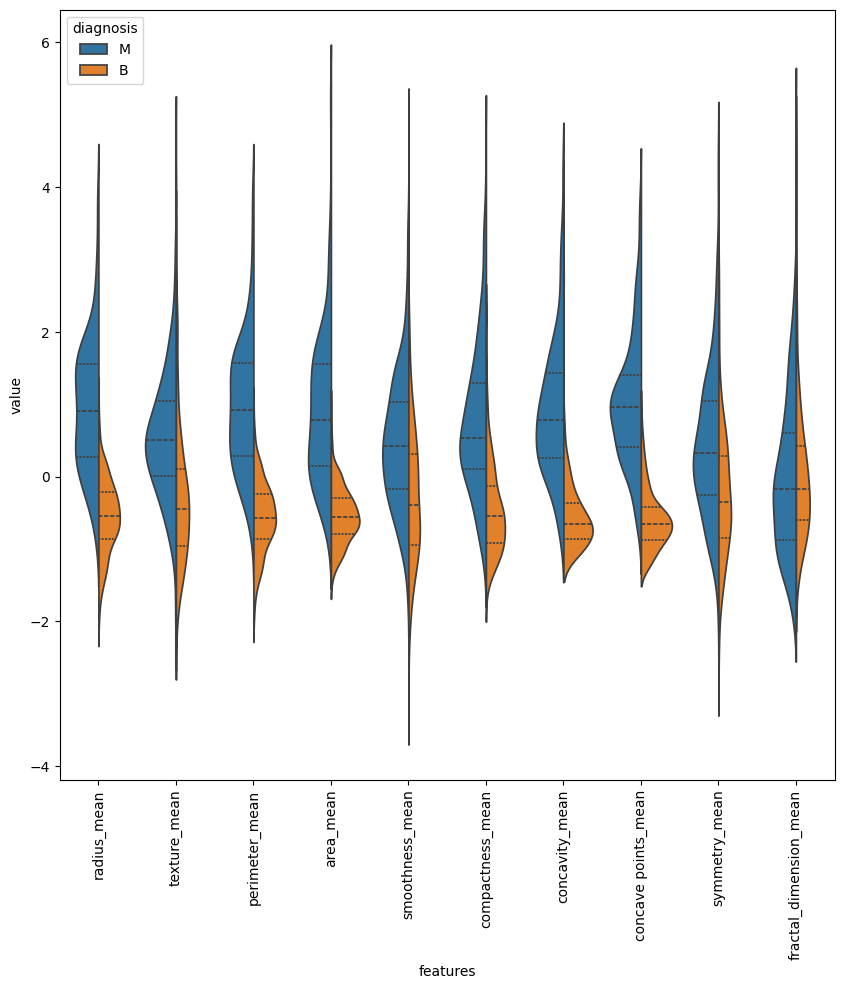

In [12]:
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

 #### 4. Swarm Plot

 In these three plots which feature looks like more clear in terms of classification. In my opinion area_worst in last swarm plot looks like malignant and benign are seprated not totaly but mostly. Hovewer, smoothness_se in swarm plot 2 looks like malignant and benign are mixed so it is hard to classfy while using this feature.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

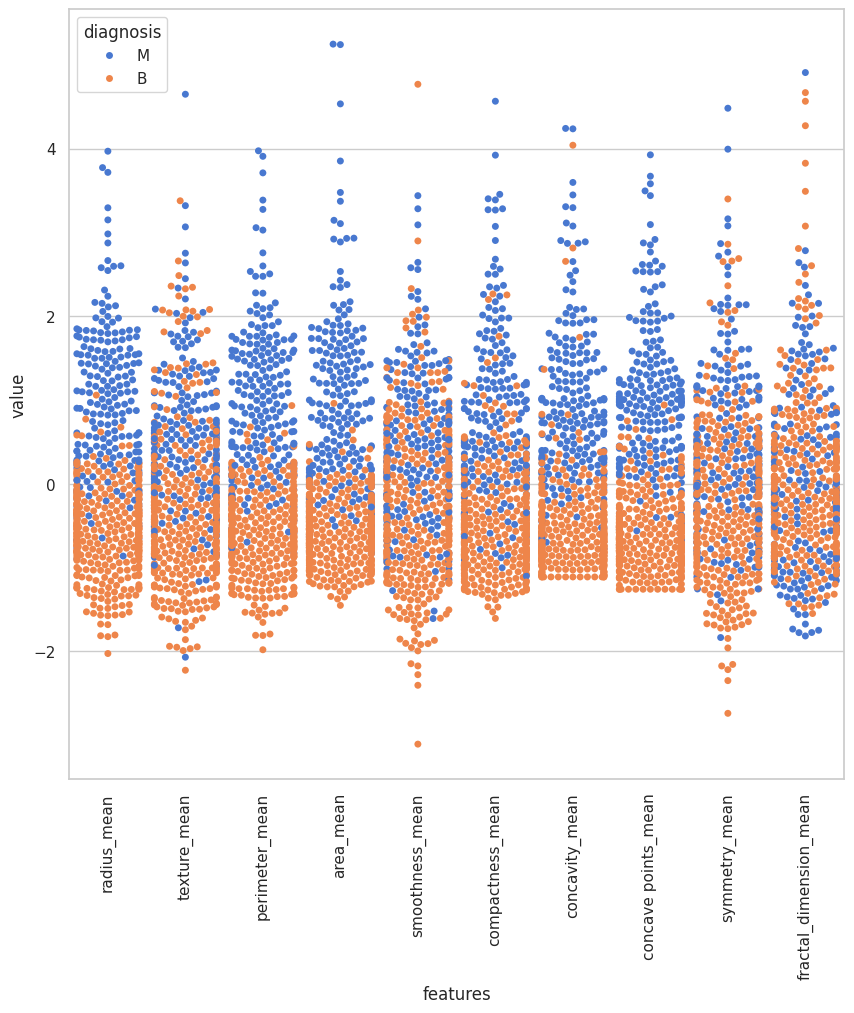

In [13]:
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

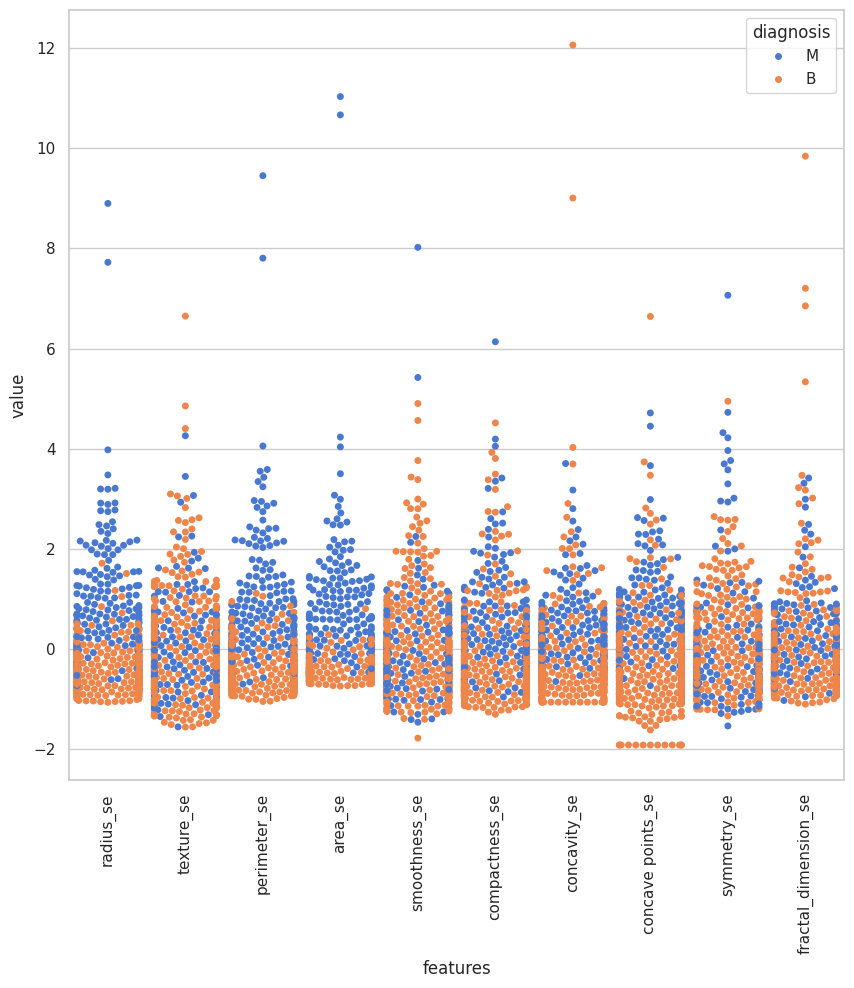

In [14]:
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

swarm plot time:  49.37626504898071  s


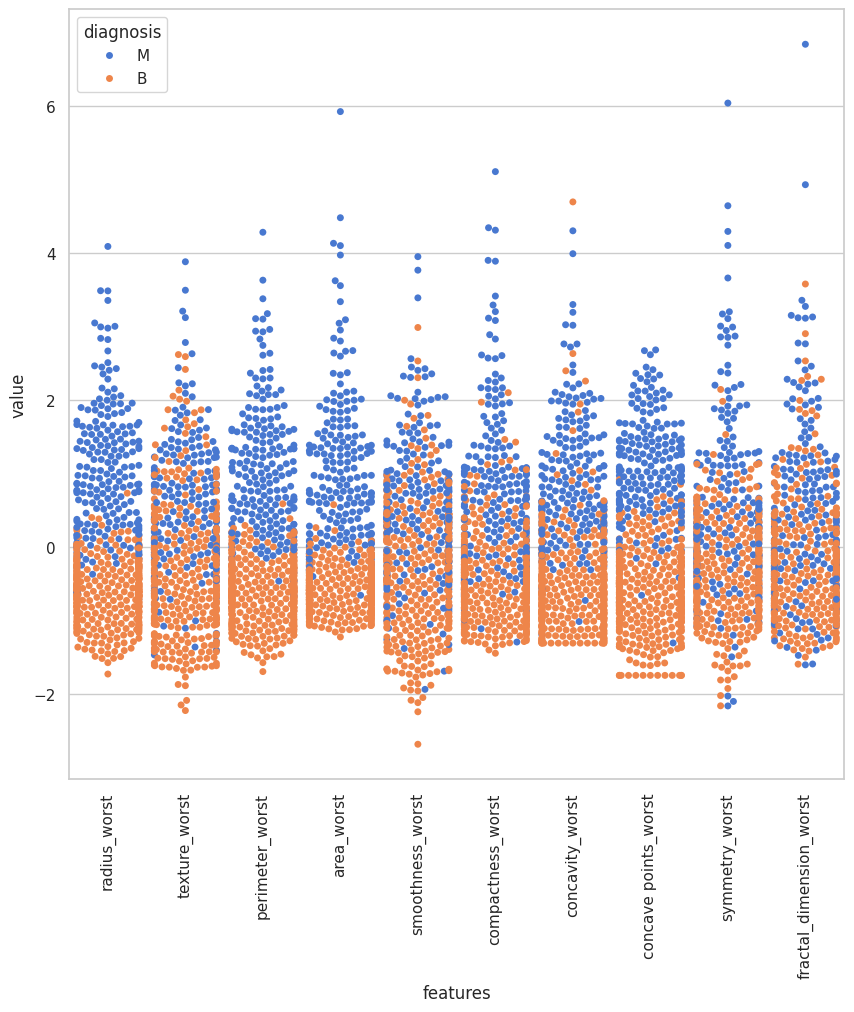

In [15]:
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
toc = time.time()
plt.xticks(rotation=90)
print("swarm plot time: ", toc-tic ," s")

#### 5. Heatmap (Correlation Matrix)

 We use heatmap to observe all correlation between features.

<Axes: >

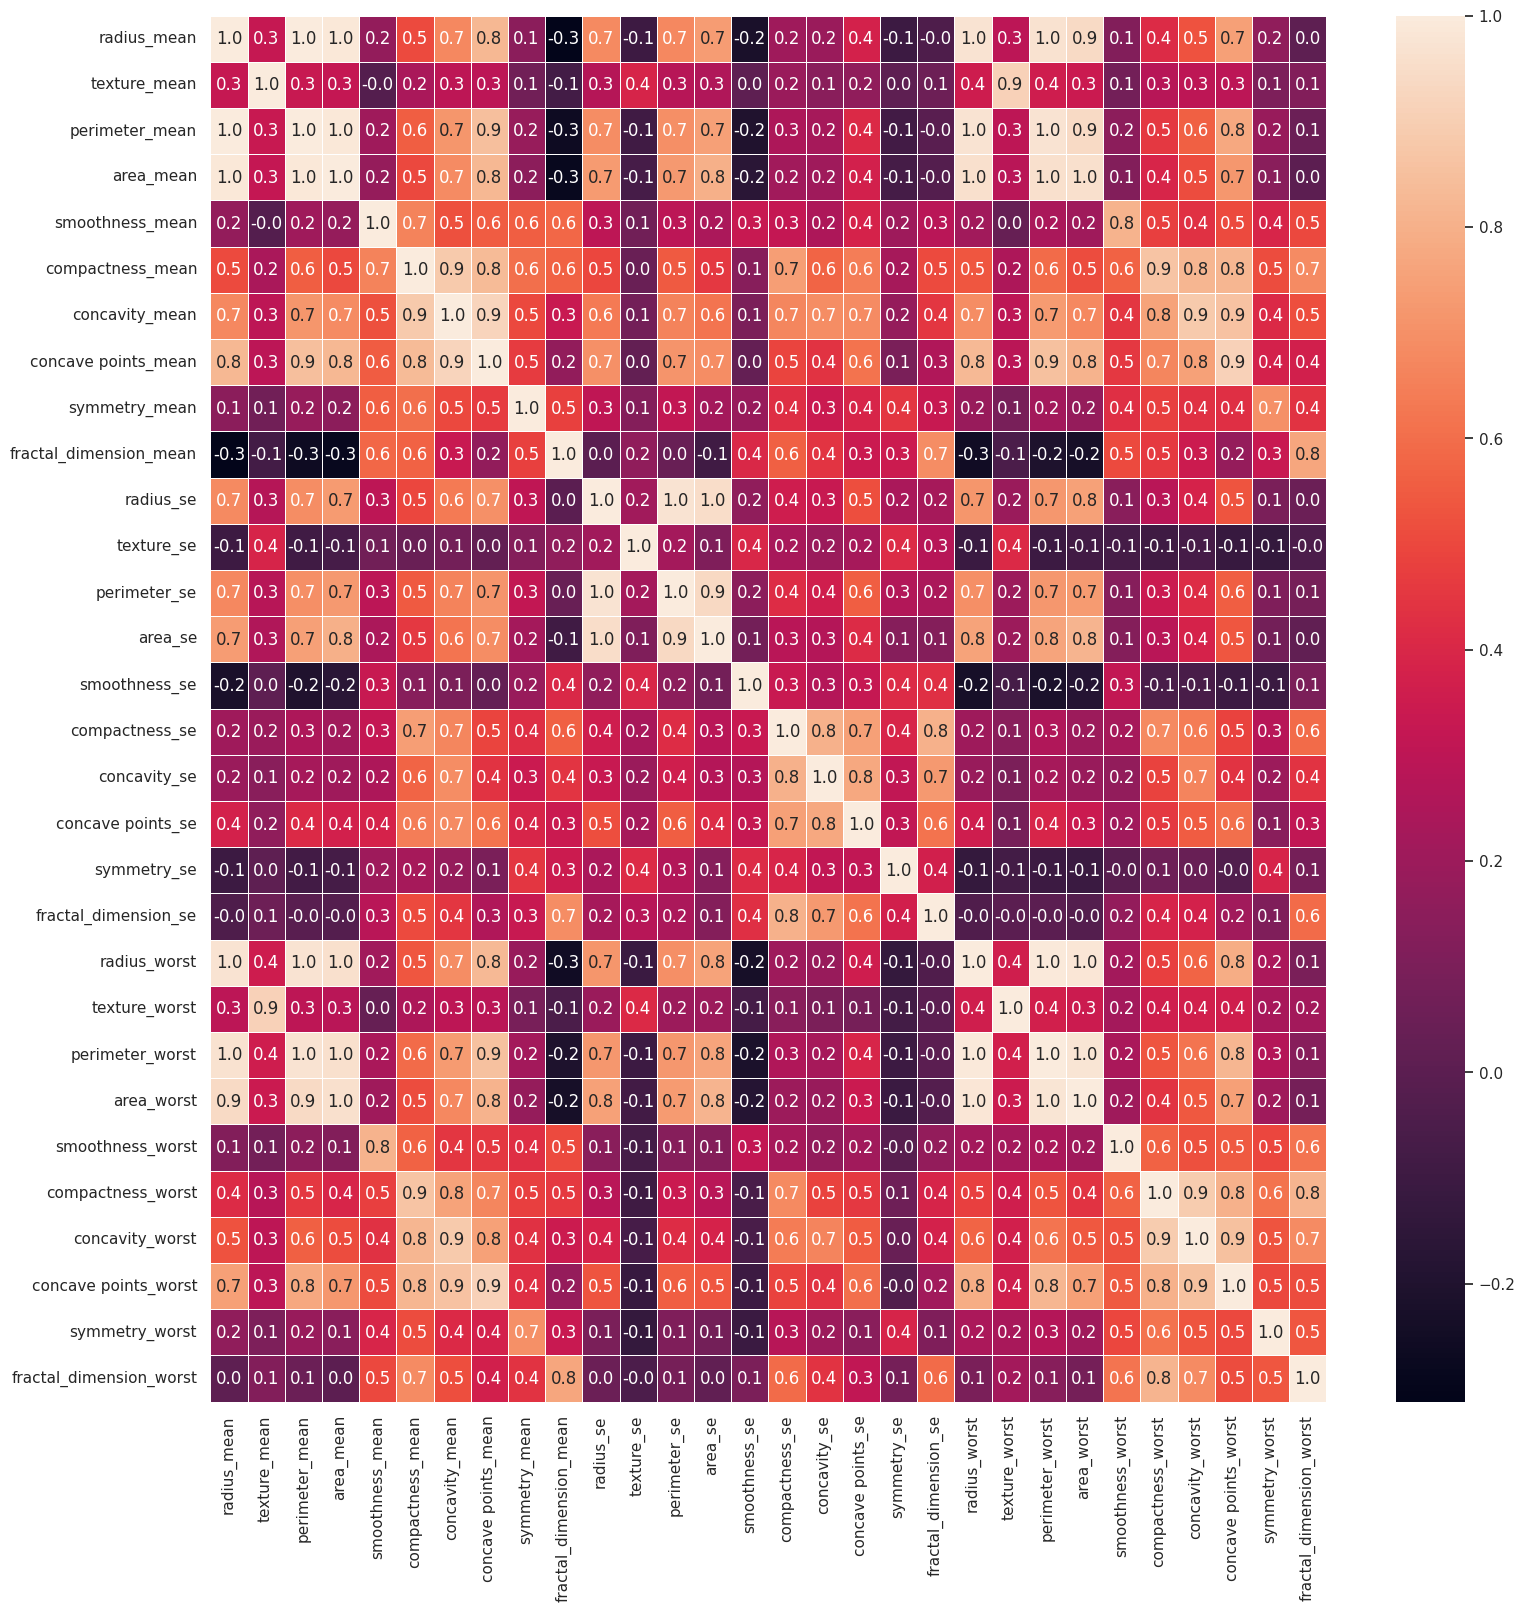

In [16]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

## **2. Data Preprocessing**

### 2.1 Data Cleaning

We dropped three columns for the following reasons:
1. There is an id that cannot be used for classificaiton.
2. Diagnosis is our class label.
3. Unnamed: 32 feature includes NaN so we do not need it.



```
y = data.diagnosis
list = ['Unnamed: 32','id','diagnosis']
x = data.drop(list,axis = 1 )
x.head()
```
* These columns are already dropped from the dataset.

### 2.2 Feature Creation

I added two new features to the dataset i.e volume and surface area and their respective columns.

These calculated features is a form of feature engineering that leverages domain knowledge to improve analytical capabilities, potentially revealing patterns that wouldn't be immediately apparent from the raw measurements alone.

In [17]:
x_processed = x.copy()

x_processed['volume_mean'] = (4/3) * np.pi * (x_processed['radius_mean'] ** 3)
x_processed['volume_worst'] = (4/3) * np.pi * (x_processed['radius_worst'] ** 3)

x_processed['surface_area_mean'] = 4 * np.pi * (x_processed['radius_mean'] ** 2)
x_processed['surface_area_to_volume_ratio'] = x_processed['surface_area_mean'] / x_processed['volume_mean']

In [18]:
x_processed.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,volume_mean,volume_worst,surface_area_mean,surface_area_to_volume_ratio
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,24388.332049,68479.954416,4066.981442,0.166759
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,36457.886149,65371.338545,5317.144310,0.145843
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,31976.119458,54848.828605,4871.932878,0.152362
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,6238.596842,13884.221697,1638.860817,0.262697
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,34989.259425,47967.860089,5173.374977,0.147856


In [19]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 2.3 Visualizations

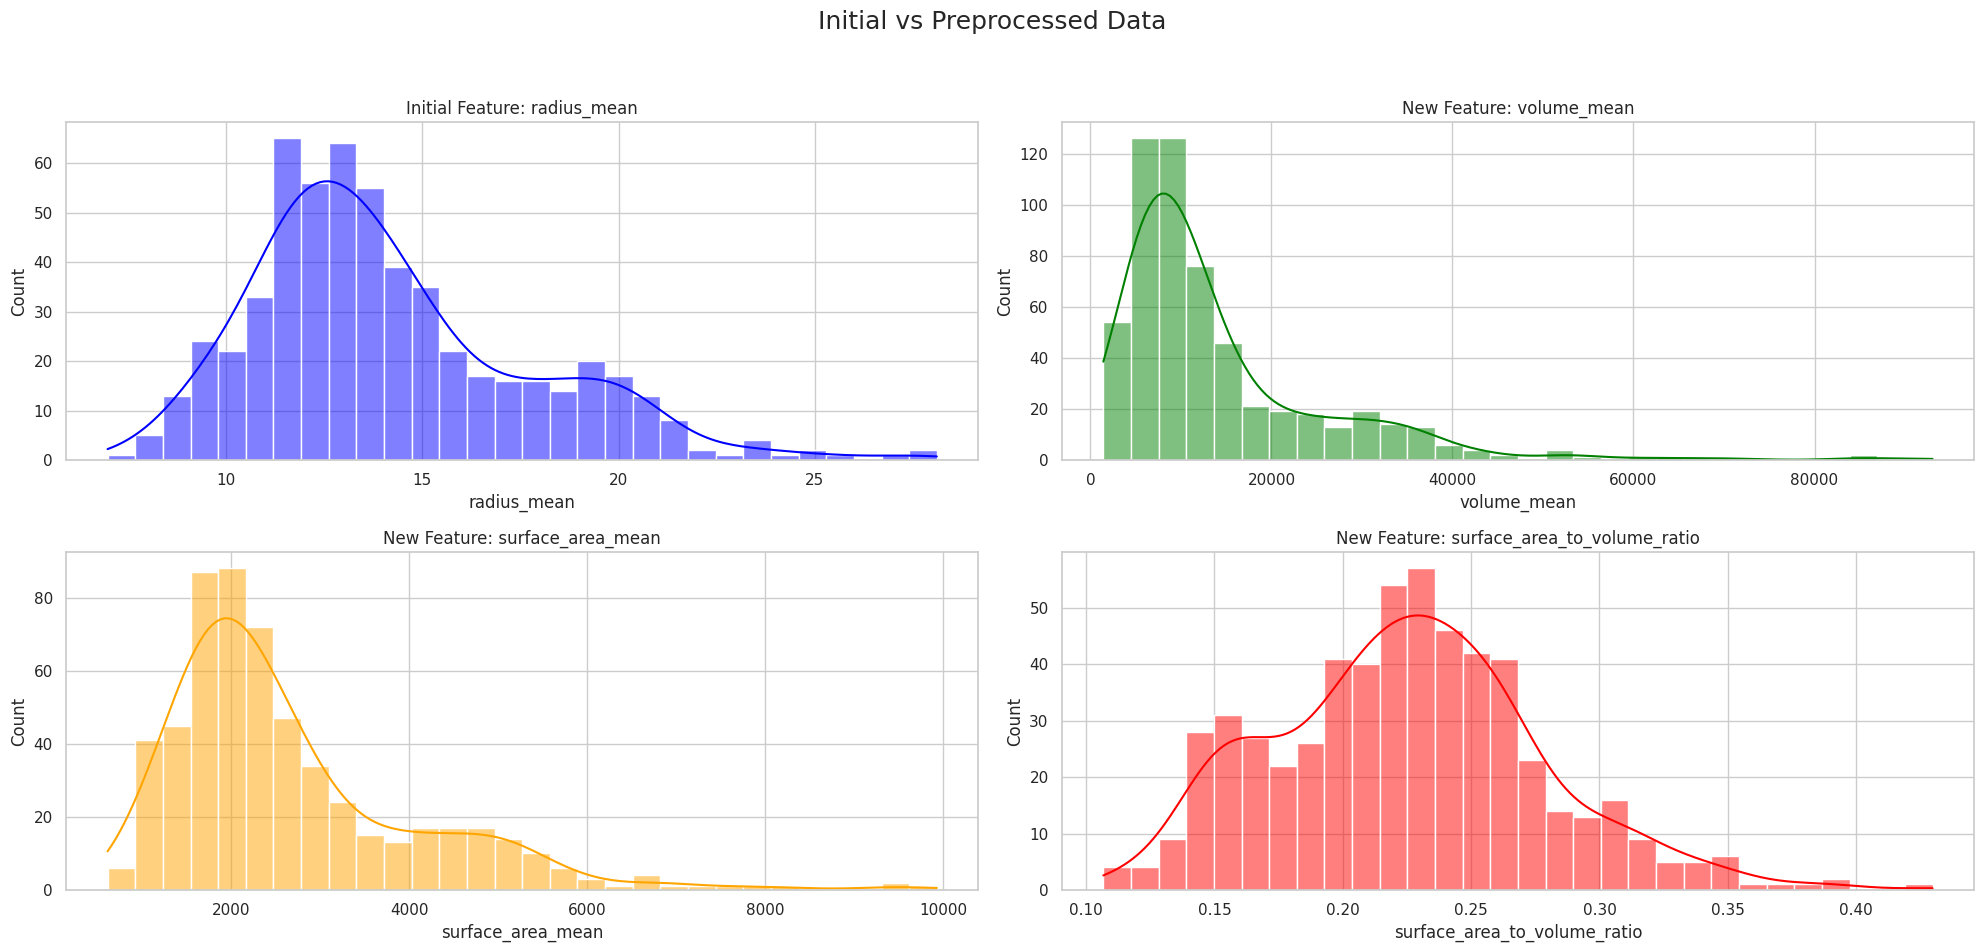

In [20]:
plt.figure(figsize=(20, 10))
plt.suptitle("Initial vs Preprocessed Data", fontsize=18)

# Plot 1: radius_mean
plt.subplot(2, 2, 1)
sns.histplot(x['radius_mean'], bins=30, kde=True, color='blue')
plt.title('Initial Feature: radius_mean')

# Plot 2: volume_mean
plt.subplot(2, 2, 2)
sns.histplot(x_processed['volume_mean'], bins=30, kde=True, color='green')
plt.title('New Feature: volume_mean')

# Plot 3: surface_area_mean
plt.subplot(2, 2, 3)
sns.histplot(x_processed['surface_area_mean'], bins=30, kde=True, color='orange')
plt.title('New Feature: surface_area_mean')

# Plot 4: surface_area_to_volume_ratio
plt.subplot(2, 2, 4)
sns.histplot(x_processed['surface_area_to_volume_ratio'], bins=30, kde=True, color='red')
plt.title('New Feature: surface_area_to_volume_ratio')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Graph Insights:**

1. The volume_mean histogram tends to be more skewed to the right. The transformation using the cubic function means that even small differences in radius lead to much larger differences in volume.

2. The distribution of surface_area_mean is calculated using the square of the radius. Its histogram usually shows a distribution that is between the linear scale of the radius and the cubic scale of the volume.

3. The histogram for surface_area_to_volume_ratio appears differently—its distribution may be somewhat left-skewed, reflecting how the ratio decreases as the cell radius increases.

4. The transformation to volume and surface area features allows models or analyses to capture nonlinear effects that the linear radius cannot.

## **3. Data Transformation and Statistical Analysis**

### 3.1 Feature selection with correlation and random forest classification

As it can be seen in map heat figure radius_mean, perimeter_mean and area_mean are correlated with each other so we will use only area_mean. So lets find other correlated features and look accuracy with random forest classifier.

Compactness_mean, concavity_mean and concave points_mean are correlated with each other.Therefore I only choose concavity_mean. Apart from these, radius_se, perimeter_se and area_se are correlated and I only use area_se. radius_worst, perimeter_worst and area_worst are correlated so I use area_worst. Compactness_worst, concavity_worst and concave points_worst so I use concavity_worst. Compactness_se, concavity_se and concave points_se so I use concavity_se. texture_mean and texture_worst are correlated and I use texture_mean. area_worst and area_mean are correlated, I use area_mean.

In [21]:
x = x_processed.copy()

In [22]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1 = x.drop(drop_list1,axis = 1 )
x_1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst,volume_mean,volume_worst,surface_area_mean,surface_area_to_volume_ratio
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890,24388.332049,68479.954416,4066.981442,0.166759
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902,36457.886149,65371.338545,5317.144310,0.145843
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758,31976.119458,54848.828605,4871.932878,0.152362
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300,6238.596842,13884.221697,1638.860817,0.262697
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678,34989.259425,47967.860089,5173.374977,0.147856


<Axes: >

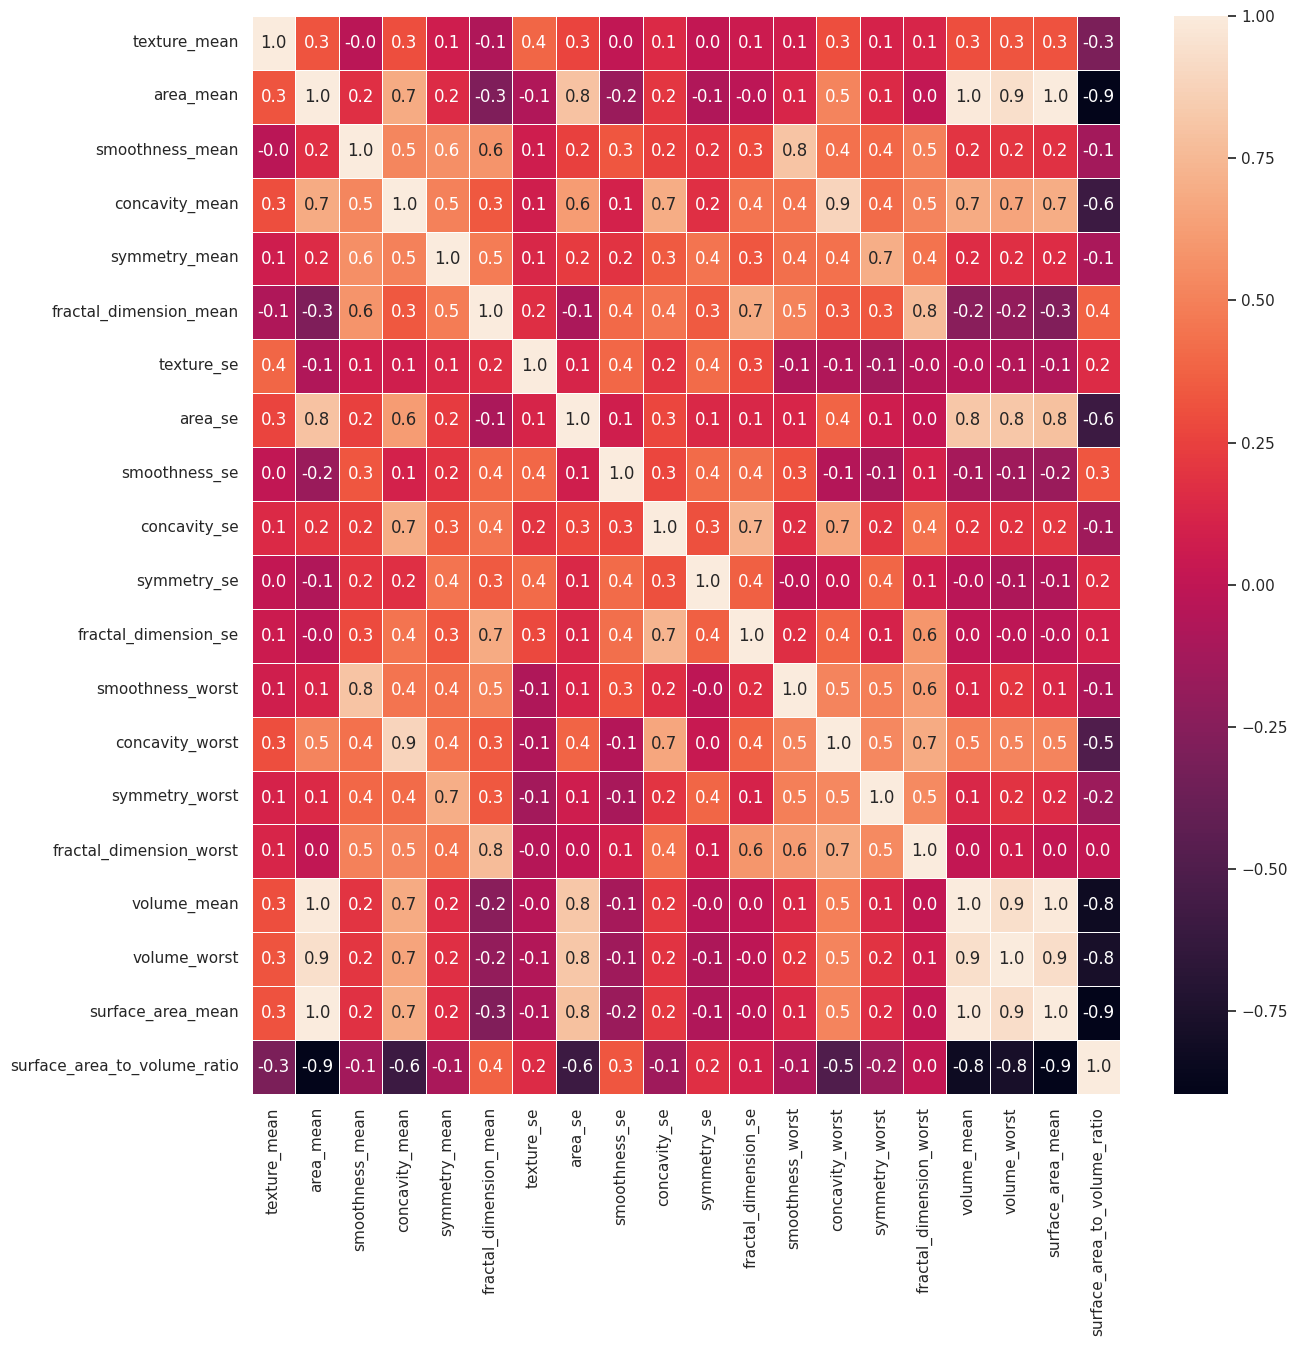

In [23]:
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Accuracy is:  0.9707602339181286


<Axes: >

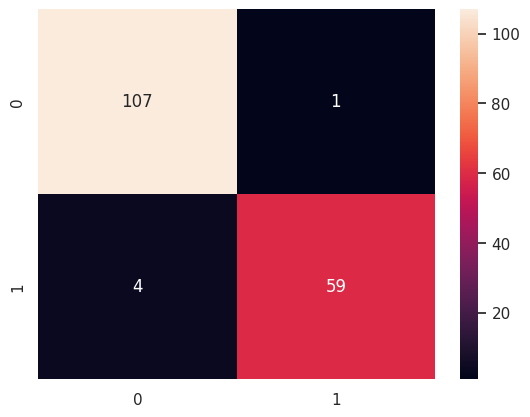

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

clf_rf = RandomForestClassifier(random_state=43)
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

Accuracy is almost 97% and as it can be seen in confusion matrix, we made few wrong prediction.

In random forest classification method there is a featureimportances attributes that is the feature importances (the higher, the more important the feature).

Feature ranking:
1. feature 17 (0.212449)
2. feature 3 (0.126746)
3. feature 1 (0.100625)
4. feature 13 (0.088130)
5. feature 19 (0.081089)
6. feature 7 (0.070917)
7. feature 18 (0.062191)
8. feature 16 (0.061553)
9. feature 14 (0.030232)
10. feature 0 (0.029924)
11. feature 12 (0.029548)
12. feature 9 (0.019435)
13. feature 15 (0.013131)
14. feature 2 (0.012590)
15. feature 10 (0.012142)
16. feature 4 (0.012032)
17. feature 11 (0.010807)
18. feature 6 (0.010073)
19. feature 5 (0.008420)
20. feature 8 (0.007966)


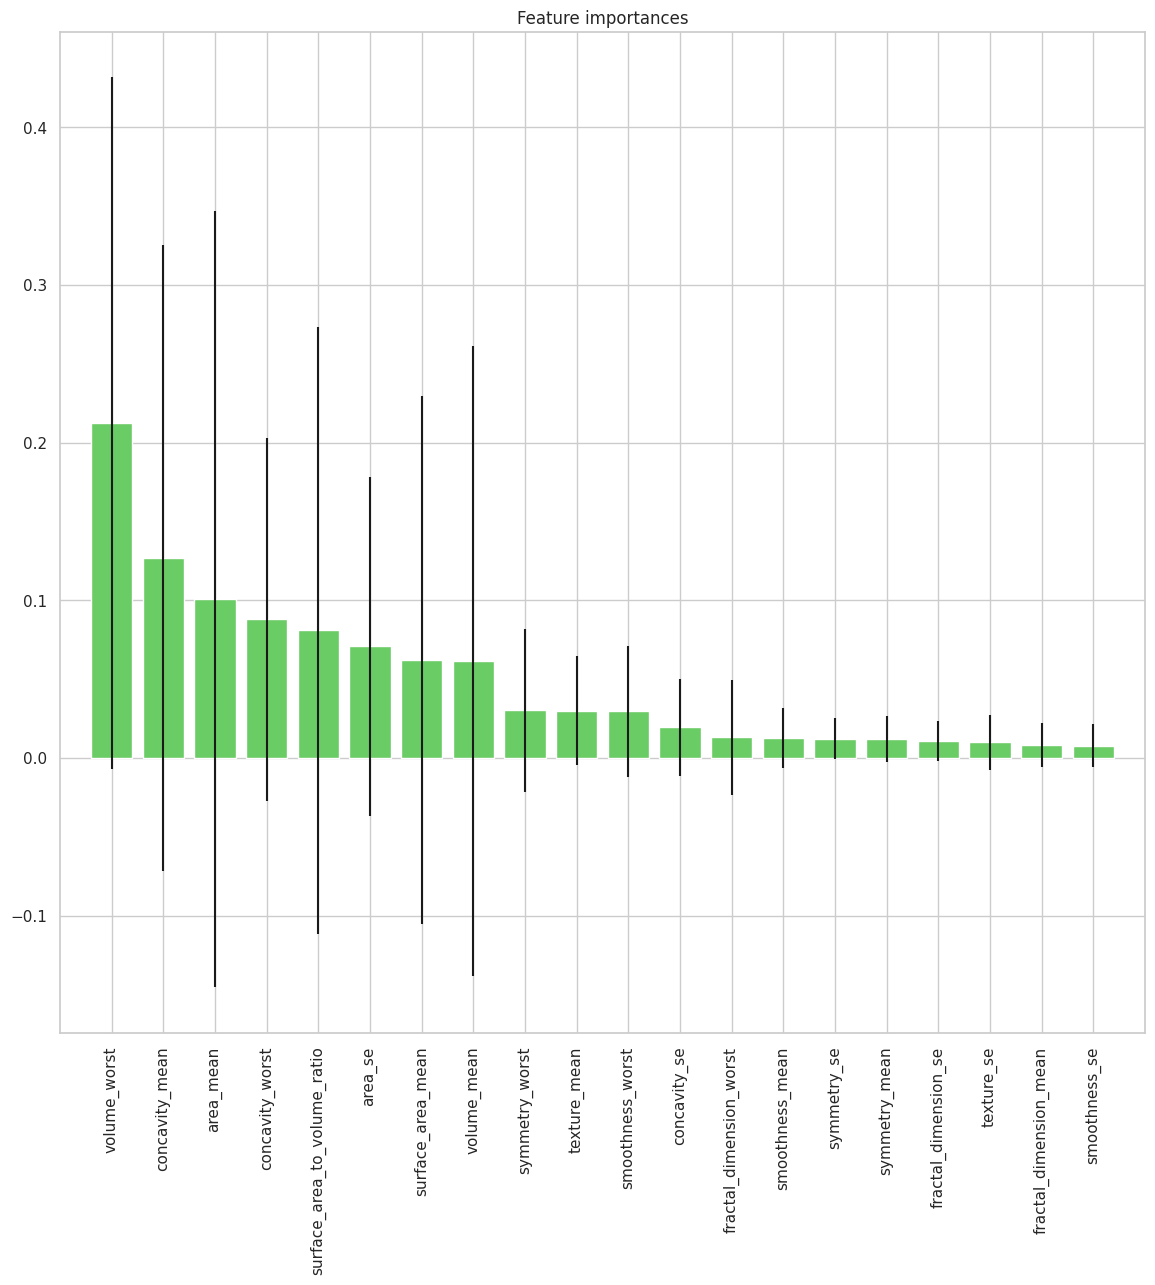

In [25]:
clf_rf_5 = RandomForestClassifier()
clr_rf_5 = clf_rf_5.fit(x_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

As you can seen in plot above, after 7 best features importance of features decrease. Therefore we can focus these 7 features.

### 3.2 Feature Extraction with PCA

We will use principle component analysis (PCA) for feature extraction. Before PCA, we need to normalize data for better performance of PCA.

Text(0, 0.5, 'explained_variance_ratio_')

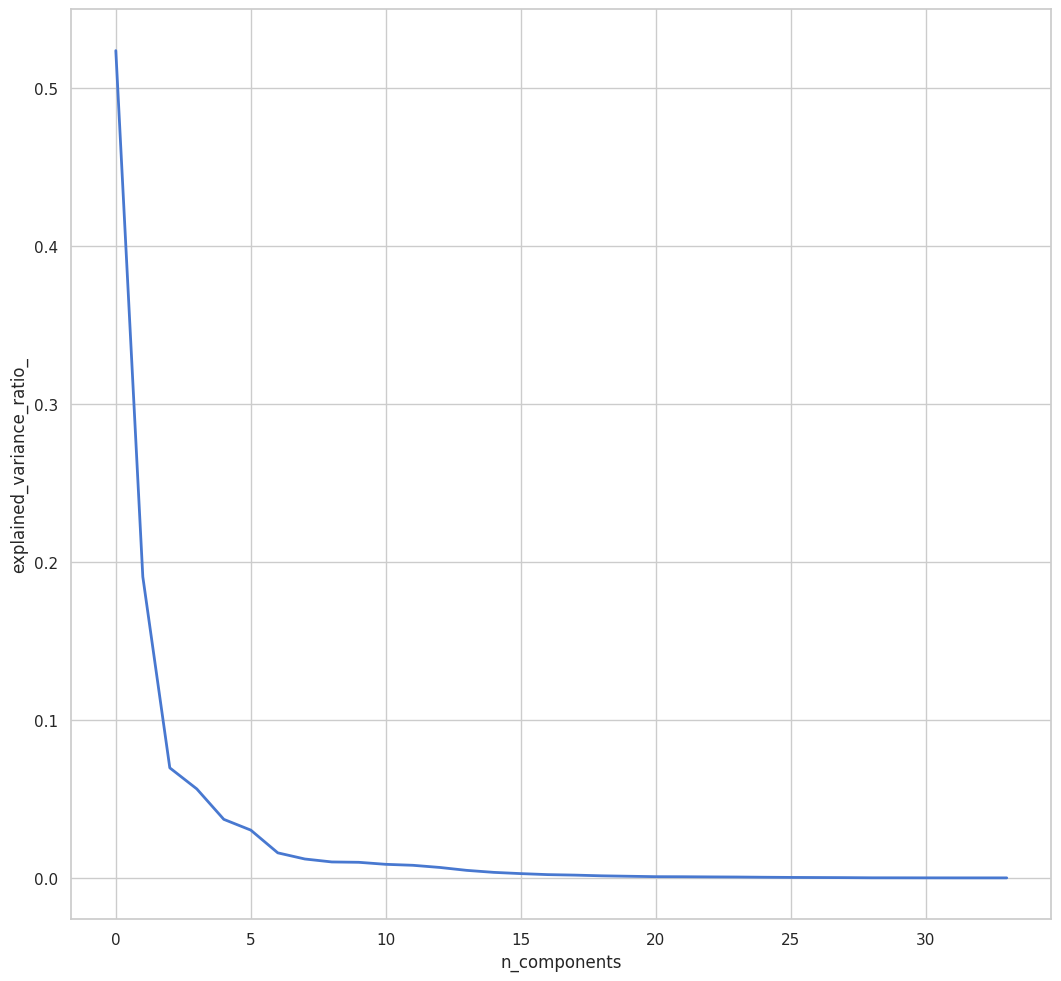

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
#normalization
x_train_N = (x_train-x_train.mean())/(x_train.max()-x_train.min())
x_test_N = (x_test-x_test.mean())/(x_test.max()-x_test.min())

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_N)

plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

**According to variance ratio, 3 components can be chosen.**

### 3.3 Hypothesis Testing

I want to learn that are radius mean and area mean related with each other? My null hypothesis is that "relationship between radius mean and area mean is zero in tumor population'.


Now we need to refute this null hypothesis in order to demonstrate that radius mean and area mean are related. (actually we know it from our previous experiences)


lets find p-value (probability value)

In [27]:
statistic, p_value = stats.ttest_rel(x.radius_mean,x.area_mean)
print('p-value: ',p_value)

p-value:  1.5253492492559045e-184


P values is almost zero so we can reject null hypothesis.

## **4. Model Implementation**

### 4.1 Random Forest Classification

The Random Forest Classifier by default does not apply any specific strategy to address class imbalance. It builds multiple decision trees using bootstrap samples, and each tree is built without being explicitly told to balance class weights. This means that if one class appears more frequently than another, the model may favor the majority class in its predictions.



Accuracy is: 0.9707602339181286


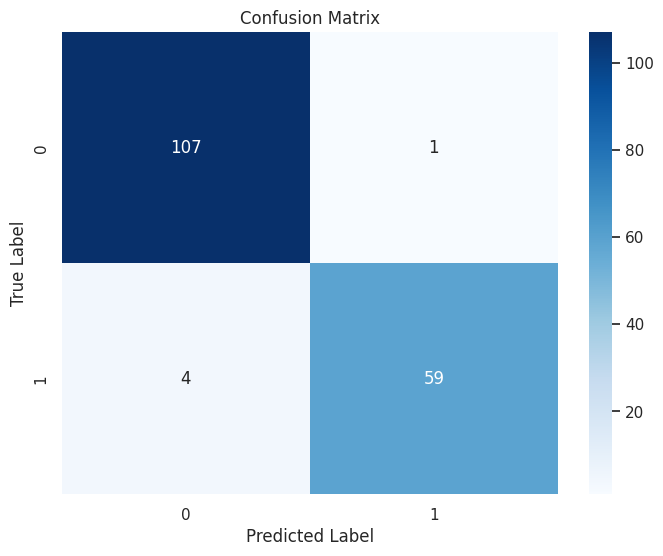


Classification Report:
              precision    recall  f1-score    support
B              0.963964  0.990741  0.977169  108.00000
M              0.983333  0.936508  0.959350   63.00000
accuracy       0.970760  0.970760  0.970760    0.97076
macro avg      0.973649  0.963624  0.968259  171.00000
weighted avg   0.971100  0.970760  0.970604  171.00000


In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier (default n_estimators=10)
clf_rf = RandomForestClassifier(random_state=43)
clf_rf.fit(x_train, y_train)

accuracy_score_rf = accuracy_score(y_test, clf_rf.predict(x_test))
print('Accuracy is:', accuracy_score_rf)

# Compute confusion matrix
cm_rf = confusion_matrix(y_test, clf_rf.predict(x_test))
plt.figure(figsize=(8,6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Generate classification report
report = classification_report(y_test, clf_rf.predict(x_test), output_dict=True)
report_df = pd.DataFrame(report).transpose()
print("\nClassification Report:")
print(report_df)

### 4.2 Logistic Regression

Logistic Regression is a popular choice for classification tasks because it models the probability of an instance belonging to a particular class using the logistic (sigmoid) function. This makes it especially useful for binary classification problems.

Accuracy: 0.9590643274853801


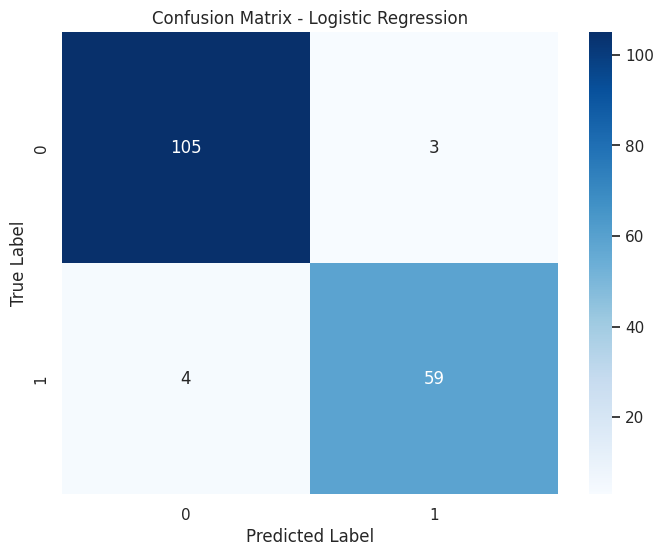


Classification Report:
              precision    recall  f1-score     support
B              0.963303  0.972222  0.967742  108.000000
M              0.951613  0.936508  0.944000   63.000000
accuracy       0.959064  0.959064  0.959064    0.959064
macro avg      0.957458  0.954365  0.955871  171.000000
weighted avg   0.958996  0.959064  0.958995  171.000000


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the dataset: 70% training, 30% testing
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

lr_model = LogisticRegression(solver='liblinear', random_state=42)
lr_model.fit(x_train, y_train)

predictions = lr_model.predict(x_test)

# Calculate Accuracy
accuracy_score_lr = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy_score_lr)

# Plot Confusion Matrix
cm_lr = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Generate Classification Report and display it as a table
report = classification_report(y_test, predictions, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print("\nClassification Report:")
print(report_df)

By default, Logistic Regression does not adjust for class imbalance. However, if there is a class imbalance issue, we specified the parameter class_weight='balanced' when initializing the model. This parameter automatically adjusts the weights inversely proportional to class frequencies to mitigate bias towards the majority class.

### 4.3 Xgboost Classification

XGBoost is known for its high performance and speed, especially on structured or tabular datasets. It uses gradient boosting on decision trees to capture complex interactions in the data efficiently.

Accuracy: 0.9707602339181286


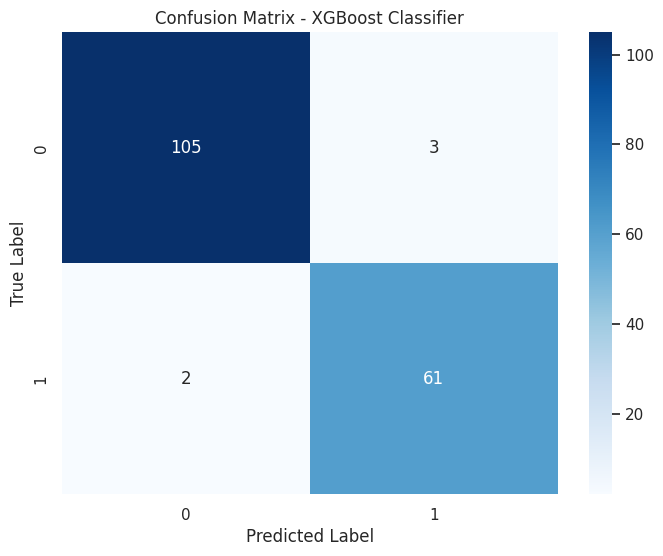


Classification Report:
              precision    recall  f1-score    support
B              0.981308  0.972222  0.976744  108.00000
M              0.953125  0.968254  0.960630   63.00000
accuracy       0.970760  0.970760  0.970760    0.97076
macro avg      0.967217  0.970238  0.968687  171.00000
weighted avg   0.970925  0.970760  0.970807  171.00000


In [30]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Split the dataset: 70% training, 30% testing
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Create and train the XGBoost model
xgb_model = XGBClassifier(random_state=42, n_estimators=100, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(x_train, y_train_encoded) # Use encoded target variable for training

# Predictions on the test data (using encoded test data)
predictions = xgb_model.predict(x_test)

# Decode predictions back to original labels for evaluation
decoded_predictions = label_encoder.inverse_transform(predictions)

# Calculate accuracy (using decoded predictions)
accuracy_score_xg = accuracy_score(y_test, decoded_predictions)
print("Accuracy:", accuracy_score_xg)

# Plot Confusion Matrix (using decoded predictions)
cm_xg = confusion_matrix(y_test, decoded_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xg, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix - XGBoost Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Generate Classification Report (using decoded predictions) and display as table
report = classification_report(y_test, decoded_predictions, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print("\nClassification Report:")
print(report_df)

XGBoost does not automatically solve class imbalance problems. However, you can address imbalance by adjusting the parameter scale_pos_weight (commonly used in binary classification) to assign a higher weight to the minority class.

## **5. Results and Comparisons**

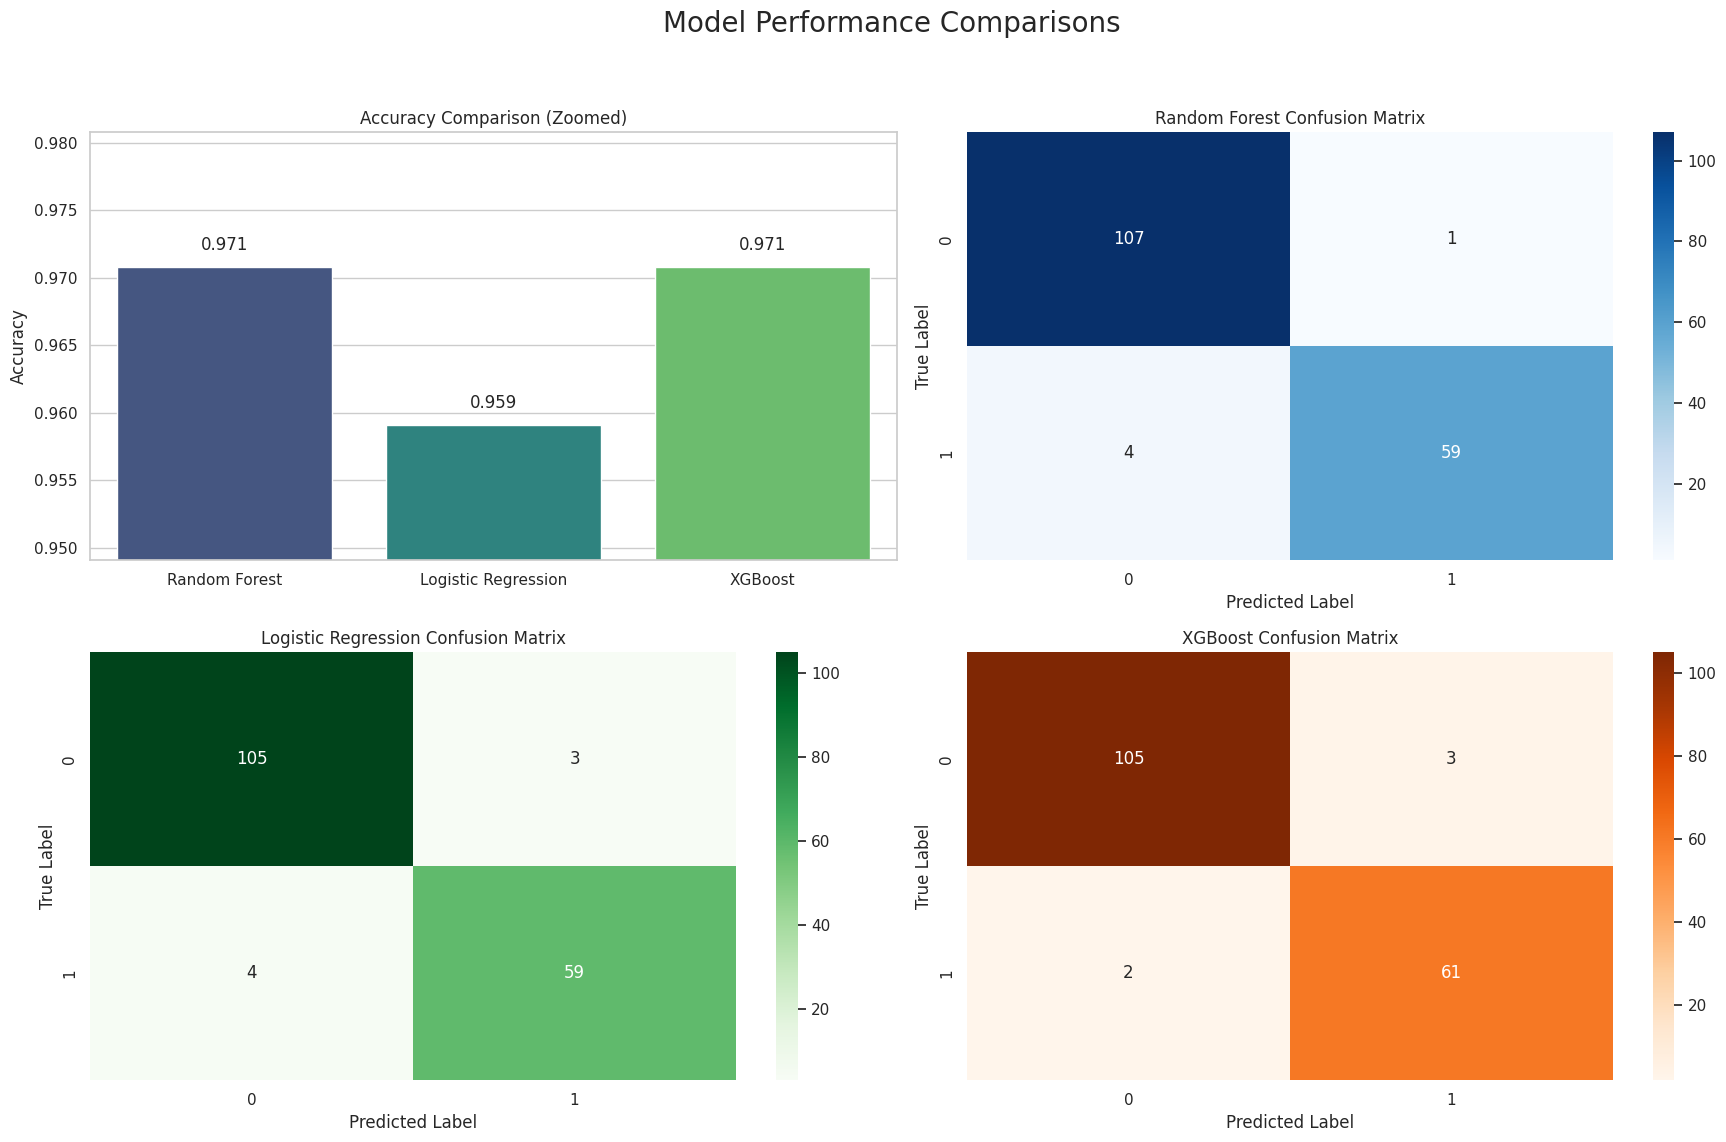

In [31]:
# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle("Model Performance Comparisons", fontsize=20)

# 1. Bar chart for Accuracy Comparison with a zoomed y-axis
models = ['Random Forest', 'Logistic Regression', 'XGBoost']
accuracies = [accuracy_score_rf, accuracy_score_lr, accuracy_score_xg]
sns.barplot(x=models, y=accuracies, palette="viridis", ax=axes[0, 0])
axes[0, 0].set_title("Accuracy Comparison (Zoomed)")
axes[0, 0].set_ylabel("Accuracy")
y_min = min(accuracies) - 0.01
y_max = max(accuracies) + 0.01
axes[0, 0].set_ylim(y_min, y_max)

# 2. Confusion Matrix for Random Forest
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", ax=axes[0, 1])
axes[0, 1].set_title("Random Forest Confusion Matrix")
axes[0, 1].set_xlabel("Predicted Label")
axes[0, 1].set_ylabel("True Label")

# 3. Confusion Matrix for Logistic Regression
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Greens", ax=axes[1, 0])
axes[1, 0].set_title("Logistic Regression Confusion Matrix")
axes[1, 0].set_xlabel("Predicted Label")
axes[1, 0].set_ylabel("True Label")

# 4. Confusion Matrix for XGBoost
sns.heatmap(cm_xg, annot=True, fmt="d", cmap="Oranges", ax=axes[1, 1])
axes[1, 1].set_title("XGBoost Confusion Matrix")
axes[1, 1].set_xlabel("Predicted Label")
axes[1, 1].set_ylabel("True Label")

# Annotate each bar with its accuracy value
for i, acc in enumerate(accuracies):
    axes[0, 0].text(i, acc + 0.001, f"{acc:.3f}", ha='center', va='bottom', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Accuracy Comparison**
  
  Random Forest and XGBoost share the highest reported accuracy (around 0.971), slightly outperforming Logistic Regression (around 0.959). All three algorithms performed relatively well in this specific dataset.

**Confusion Matrices**

Each confusion matrix provides a deeper look into the types of errors each model makes:

1. Random Forest:
Shows a small number of false positives and false negatives.
High correct classifications in both classes, consistent with its top accuracy score.

2. Logistic Regression:
Slightly more misclassifications than Random Forest and XGBoost (noticeable in the off-diagonal cells).
Even so, it still achieves a respectable accuracy (about 95.9%).

3. XGBoost:
Confusion matrix looks similar to Random Forest’s with very few off-diagonal errors.
Maintains high accuracy due to effectively classifying both classes correctly.

From these visual results alone, it’s clear:

1. Random Forest and XGBoost are nearly tied for best performance in terms of accuracy and confusion matrix outcomes.

2. Logistic Regression remains competitive but slightly underperforms the other two.

3. For practical decisions, choosing between Random Forest and XGBoost may come down to other considerations like training speed, interpretability, or resource constraints, given their near-identical performance.

**Best Model Selection Criteria**
1. Precision:
Measures the proportion of correctly predicted positive instances among all instances predicted as positive.
Criterion: High precision is critical when the cost of a false positive is high (e.g., in spam detection, diagnosing disease).

2. Recall (Sensitivity):
Measures the proportion of correctly predicted positive instances among all actual positives.
Criterion: High recall is essential when missing a positive case would be costly (e.g., early cancer detection).

3. F1-Score:
The harmonic mean of precision and recall.
Criterion: F1-score provides a balance between precision and recall, particularly useful when both false positives and false negatives carry similar consequences.

**Model Complexity & Performance:**

Random Forest and XGBoost not only maintain higher overall accuracy but also deliver balanced performance in terms of precision and recall, especially by handling the nonlinear interactions more effectively than Logistic Regression.

1. Trade-Off Between Precision and Recall:

* Random Forest excels in precision for malignant cases, reducing false positives.

* XGBoost improves on recall for malignant cases, ensuring fewer cases are missed, which can be crucial in medical diagnostics.

2. Use Case Considerations:

* If reducing false positives is the priority (e.g., avoiding unnecessary interventions), Random Forest might be preferred.

* If catching as many true malignant cases as possible is critical, XGBoost’s higher recall makes it attractive.

* Logistic Regression, while competitive, may serve as a good baseline but might not capture nonlinear dynamics as effectively as the tree-based models.

**Submitted By**
**Rajat Kumar Thakur (202211070)**